Test d'intégration d'une équation simple (pendule double)

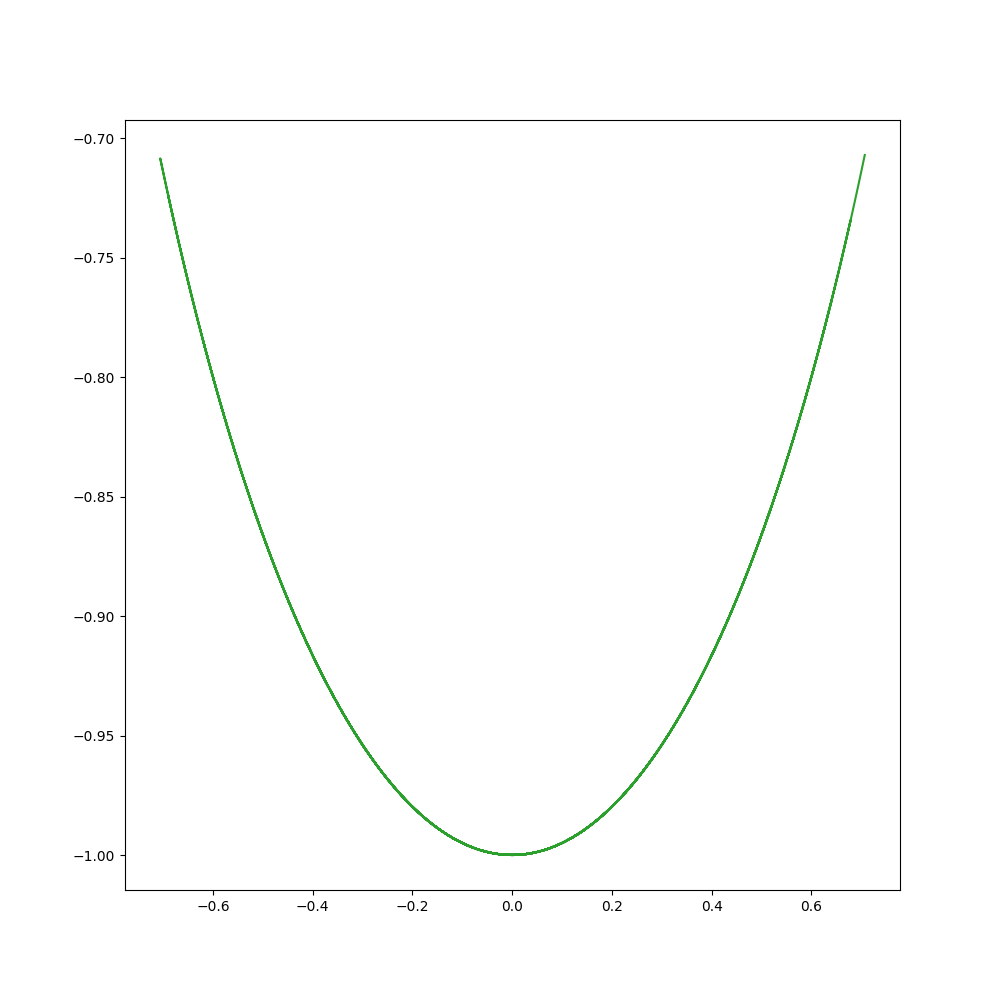

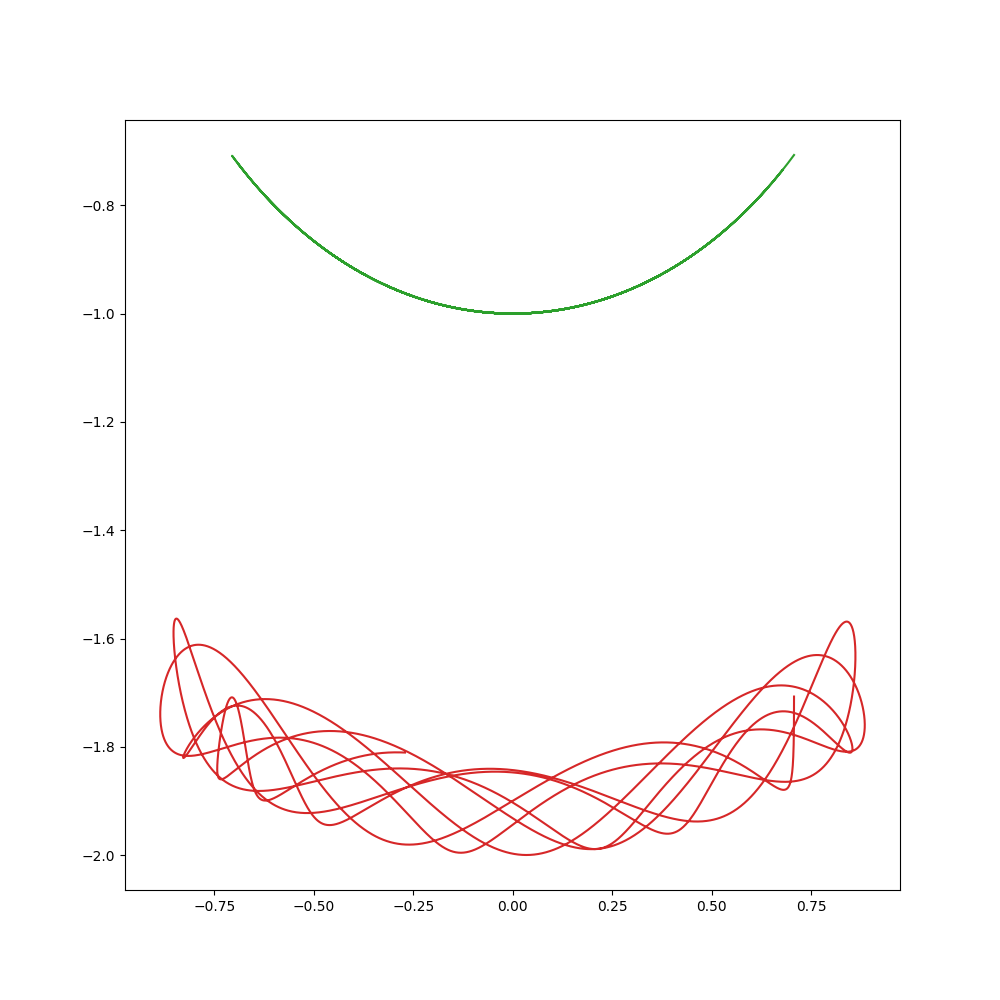

In [7]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

L1 = 1
L2 = 1
M1 = 1
M2 = 2
g = 9.81

def PenduleDouble(X,T):
    Theta1, DTheta1, Theta2, DTheta2 = X
    
    DeltaTheta = Theta1 - Theta2
    Alpha = M1 + M2 * np.sin(DeltaTheta)**2
    M=M1+M2
    
    DDTheta1 = (-np.sin(DeltaTheta)*(M2*L1*DTheta1**2*np.cos(DeltaTheta) + M2*L2*DTheta2**2) - g*(M*np.sin(Theta1) -M2*np.sin(Theta2)*np.cos(DeltaTheta)))/(L1*Alpha)
    DDTheta2 = (np.sin(DeltaTheta)*(M*L1*DTheta1**2 +M2*L2*DTheta2**2*np.cos(DeltaTheta)) + g*(M*np.sin(Theta1)*np.cos(DeltaTheta)-M*np.sin(Theta2)))/(L2*Alpha)
    
    return [DTheta1, DDTheta1, DTheta2, DDTheta2]
    
# Initial conditions
X0 = [np.pi/4, 0.0, 0.0, 0.0]
Times = np.linspace(0, 10, 10000)

Solution=odeint(PenduleDouble, X0, Times)
plt.plot(np.sin(Solution[:,0]),-np.cos(Solution[:,0]))
plt.plot(np.sin(Solution[:,0]) + np.sin(Solution[:,2]),-np.cos(Solution[:,0]) - np.cos(Solution[:,2]))
plt.show()

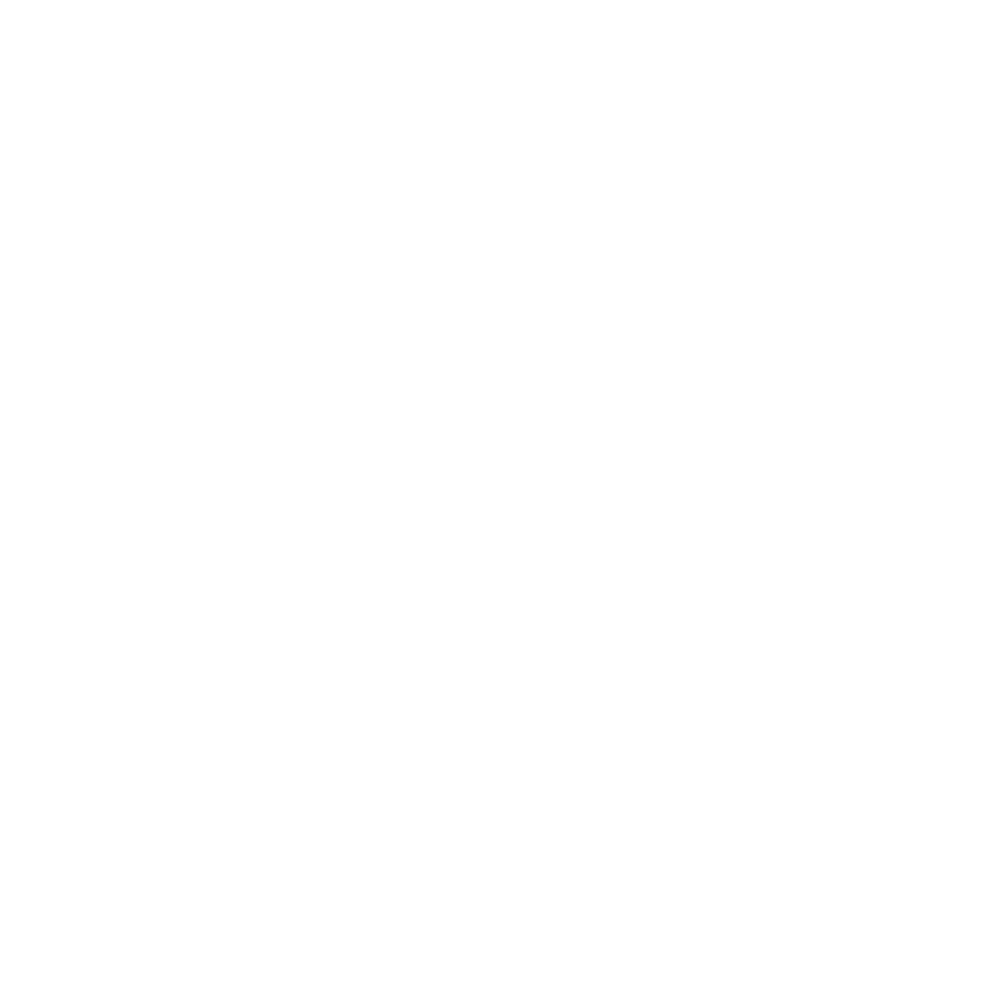

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

animatedFig = plt.figure(figsize=(10,10))
X1,Y1 = [],[]
X2,Y2 = [],[]

index = 0
def Animate(i):
    X1.append(np.sin(Solution[index,0]))
    Y1.append(-np.cos(Solution[index,0]))
    
    X2.append(np.sin(Solution[index,0]) + np.sin(Solution[index,2]))
    Y2.append(-np.cos(Solution[index,0]) - np.cos(Solution[index,2]))
    plt.plot(X1,Y1)

Animation = FuncAnimation(animatedFig, Animate, interval=300)
plt.show()